In [362]:
import sympy as sp
import time
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np

In [363]:
#given values hot fluid: lube oil, cold fluid: crude oil
values = {
    # 'L': 10,
    'Hi': 5, #m  
    'Hf': 0.5, #m
    'g': 10,
    'D': 0.5, #m 
    'd': 0.01, #m
    'rho': 1000, #kg/m3
    'mu': 0.0010016 #Pa·s
}

In [364]:
Hi, Hf, L, V1, g, A1, A0, f, D, d, rho, mu, K, H = sp.symbols('Hi Hf L V1 g A1 A0 f D d rho, mu K H', real=True)

In [365]:
A1 = sp.pi*(d*d/4)
A1

pi*d**2/4

In [366]:
A0 = sp.pi*(D*D/4)
A0

pi*D**2/4

In [367]:
V = sp.sqrt( (2*g*(H + L)) )
V

sqrt(2)*sqrt(g*(H + L))

In [368]:
fn = (1 / ( (4*sp.log( ( d*V*rho*sp.sqrt(f) )/( mu ) )) -0.4 ))**2 - f 
fn

-f + 1/(16*(log(sqrt(2)*d*sqrt(f)*rho*sqrt(g*(H + L))/mu) - 0.1)**2)

In [369]:
delta_P = (f*L*rho*(V**2))/(2*d)
delta_P

L*f*g*rho*(H + L)/d

In [370]:
P_ideal = rho*g*(H+L)

In [371]:
P_actual = P_ideal - delta_P
P_actual

-L*f*g*rho*(H + L)/d + g*rho*(H + L)

In [372]:
K = A1/A0
K

d**2/D**2

In [373]:
V_actual = sp.root(2*P_actual/rho, 2)
V_actual

sqrt((-2*L*f*g*rho*(H + L)/d + 2*g*rho*(H + L))/rho)

In [374]:
f_t = sp.integrate((-1/(K*V_actual)), (H, Hi, Hf))
f_t

-2*D**2*sqrt((-2*L*f*g*rho*(Hf + L)/d + 2*g*rho*(Hf + L))/rho)/(d*(-2*L*f*g + 2*d*g)) + 2*D**2*sqrt((-2*L*f*g*rho*(Hi + L)/d + 2*g*rho*(Hi + L))/rho)/(d*(-2*L*f*g + 2*d*g))

In [375]:

fn = fn.subs([
    # (L, values['L']),
    (H, values['Hi']),
    (g, values['g']),
    (D, values['D']),
    (d, values['d']),
    (rho, values['rho']),
    (mu, values['mu']),

]).evalf()
fn

-f + 0.0625/(log(9984.02555910543*sqrt(2)*sqrt(f)*sqrt(10*L + 50)) - 0.1)**2

In [376]:
#differentiating
df_fn = sp.diff(fn, f)
df_fn

-1 - 0.0625/(f*(log(9984.02555910543*sqrt(2)*sqrt(f)*sqrt(10*L + 50)) - 0.1)**3)

In [377]:
f_t = f_t.subs([
    # (L, values['L']),
    (Hi, values['Hi']),
    (Hf, values['Hf']),
    (g, values['g']),
    (D, values['D']),
    (d, values['d']),
    (rho, values['rho']),
    (mu, values['mu']),

])
f_t

-2236.06797749979*sqrt(-L*f*(L + 0.5) + 0.01*L + 0.005)/(-20*L*f + 0.2) + 2236.06797749979*sqrt(-L*f*(L + 5) + 0.01*L + 0.05)/(-20*L*f + 0.2)

In [378]:
# itr_table = []
def NR(fn, df_fn, f_prev, tol, L_g, itr=1):
    decimal_places = int(-sp.log(tol, 10).evalf()+1)

    # NR definition: Xk+1 = Xk - f(k)/f'(k)
    f_next = (f_prev - fn/df_fn).subs([(f, f_prev),(L,L_g)]).round(decimal_places)
    err = abs(f_next - f_prev)
    # store the iteration in table
    # itr_table.append([itr,
    #                   f_prev,
    #                   f_next,
    #                   fn.subs([(f, f_prev),(L,L_g)]).round(6),
    #                   fn.subs([(f, f_prev),(L,L_g)]).round(decimal_places),
    #                   err])

    # if less than tolerance then return
    if err < tol:
        return f_next

    # # else go for next iteration
    itr += 1
    return NR(fn, df_fn, f_next, tol, L_g, itr)

In [381]:
# itr_table = [['itr', 'f_prev', 'f_next',
            #   'fn(f_prev)', 'fn(f_next)', 'error']]
LT_table = [['Length', 'Time']]
initial_guess = 1
L_guess = 1
tolerance = 1e-3
start = time.time()
# result_NR = NR(fn, df_fn, initial_guess, tolerance, L_guess)
Length_array = []
Time_array = []
# Time_array.append([])
# Length_array.append([])
for i in np.arange(1,10,0.01):
    result_NR = NR(fn, df_fn, initial_guess, tolerance, i)
    result_t = f_t.subs([(f, result_NR),(L,i)]).evalf()
    LT_table.append([i,
                    result_t])
    Length_array.append(i)
    Time_array.append(result_t)

end = time.time()
print(f'Time taken: {end-start} second')
print('t:', str(result_t))
print(tabulate(LT_table, headers='firstrow', tablefmt='fancy_grid'))
# print(Length_array)
# print(Time_array)

Time taken: 51.94968891143799 second
t: 2300.16742253732
╒══════════╤═════════╕
│   Length │    Time │
╞══════════╪═════════╡
│     1    │ 1435.93 │
├──────────┼─────────┤
│     1.01 │ 1434.25 │
├──────────┼─────────┤
│     1.02 │ 1432.6  │
├──────────┼─────────┤
│     1.03 │ 1430.95 │
├──────────┼─────────┤
│     1.04 │ 1429.32 │
├──────────┼─────────┤
│     1.05 │ 1427.69 │
├──────────┼─────────┤
│     1.06 │ 1426.08 │
├──────────┼─────────┤
│     1.07 │ 1424.48 │
├──────────┼─────────┤
│     1.08 │ 1422.9  │
├──────────┼─────────┤
│     1.09 │ 1421.32 │
├──────────┼─────────┤
│     1.1  │ 1419.76 │
├──────────┼─────────┤
│     1.11 │ 1418.21 │
├──────────┼─────────┤
│     1.12 │ 1416.67 │
├──────────┼─────────┤
│     1.13 │ 1415.14 │
├──────────┼─────────┤
│     1.14 │ 1413.62 │
├──────────┼─────────┤
│     1.15 │ 1412.11 │
├──────────┼─────────┤
│     1.16 │ 1410.62 │
├──────────┼─────────┤
│     1.17 │ 1409.13 │
├──────────┼─────────┤
│     1.18 │ 1407.65 │
├──────────┼─────────┤


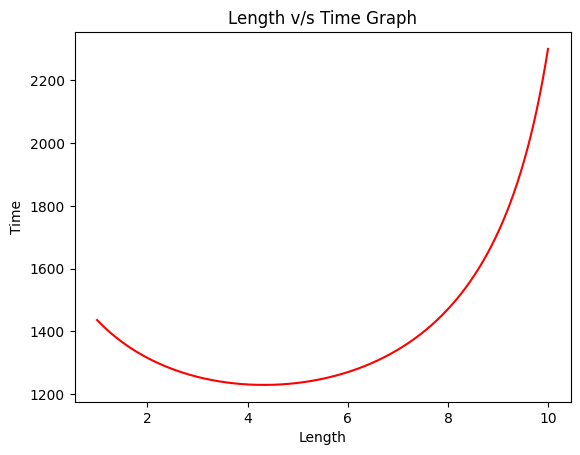

In [383]:
plt.xlabel("Length")
plt.ylabel("Time")
plt.title("Length v/s Time Graph")
plt.plot(Length_array, Time_array, color= 'red')
plt.show()